## Fake News Detection Using LSTM 

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


## Load the data

In [4]:
fake=pd.read_csv(r'C:\Users\sanga\Desktop\fake_news_lstm\data\fake.csv')
true=pd.read_csv(r'C:\Users\sanga\Desktop\fake_news_lstm\data\real.csv')


In [5]:
fake.sample(5)

,title,text,subject,date
22283,James Clapper Himself Debunks “Russia Hacked U...,21st Century Wire says We ve seen it over and ...,US_News,"January 8, 2017"
1212,Paul Ryan Claims GOP Wouldn’t Try To Have Dem...,Sometimes you get the feeling that Paul Ryan h...,News,"June 9, 2017"
19580,WORLD’S MOST FAMOUS VICTIMS Purchase Stunning ...,The Obamas are moving into a nine-bedroom mans...,left-news,"Nov 20, 2016"
22308,EP 6: Patrick Henningsen LIVE with guest Rober...,Join Patrick every Wednesday at Independent T...,US_News,"December 22, 2016"
10261,FEDERAL JUDGE STEPS IN To Review Legroom On Co...,Firebrand conservative Ann Coulter exposed Del...,politics,"Jul 31, 2017"


In [6]:
true.sample(5)

,title,text,subject,date
12177,Mexico enshrines army's role in drug war with ...,MEXICO CITY (Reuters) - Mexico s Congress on F...,worldnews,"December 15, 2017"
1270,Social media firms summoned to U.S. Congressio...,WASHINGTON (Reuters) - Representatives of Face...,politicsNews,"October 13, 2017"
13392,Skyscraper fire kills 10 in northern Chinese c...,BEIJING (Reuters) - A skyscraper fire in the n...,worldnews,"December 1, 2017"
977,First charges filed in U.S. special counsel's ...,WASHINGTON (Reuters) - A federal grand jury on...,politicsNews,"October 28, 2017"
9051,New Jersey governor proposes flat rate for edu...,(Reuters) - New Jersey Governor Chris Christie...,politicsNews,"June 21, 2016"


- Giving the fake news label 0 : 

In [7]:
fake['label']=0

In [8]:
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


- Giving the true news label 1:

In [9]:
true['label']=1

In [10]:
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


- Delete unneeded columns

In [11]:
fake.drop(columns=["title", "date", "subject"], inplace=True)
true.drop(columns=["title", "date", "subject"], inplace=True)

In [12]:
fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


- Adding the two data in the one DataFrame

In [14]:
News=pd.concat([fake, true], ignore_index=True)


In [15]:
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Data Cleaning 

In [16]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [17]:
News.isnull().sum()

text     0
label    0
dtype: int64

In [18]:
News.duplicated().sum()

6251

In [19]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

## Class Distribution 

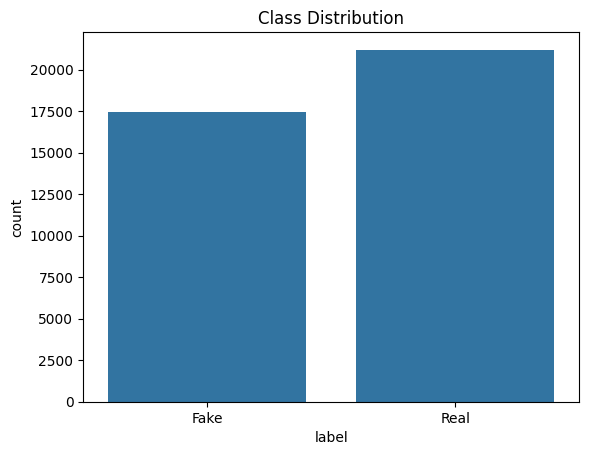

In [20]:
sns.countplot(data=News, x="label")
plt.xticks([0, 1], ["Fake", "Real"])
plt.title("Class Distribution")
plt.show()

## Article Length Distribution 

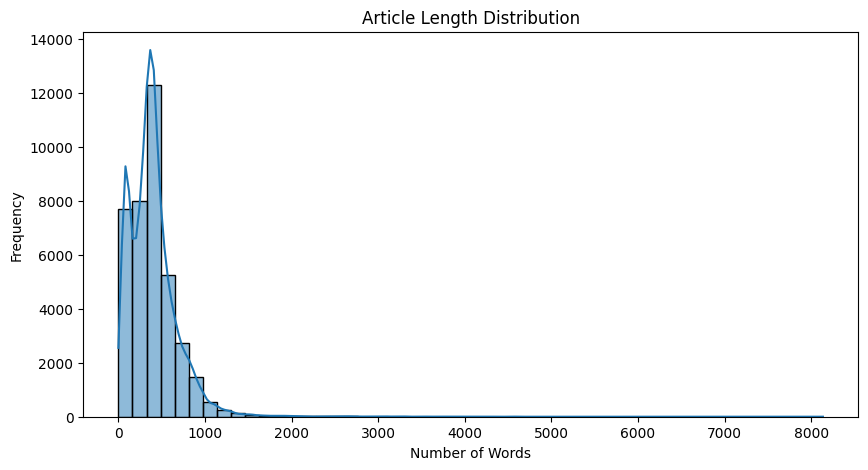

In [21]:
News["length"] = News["text"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(10, 5))
sns.histplot(data=News, x="length", bins=50, kde=True)
plt.title("Article Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()



## Word Cloud for Fake vs Real News

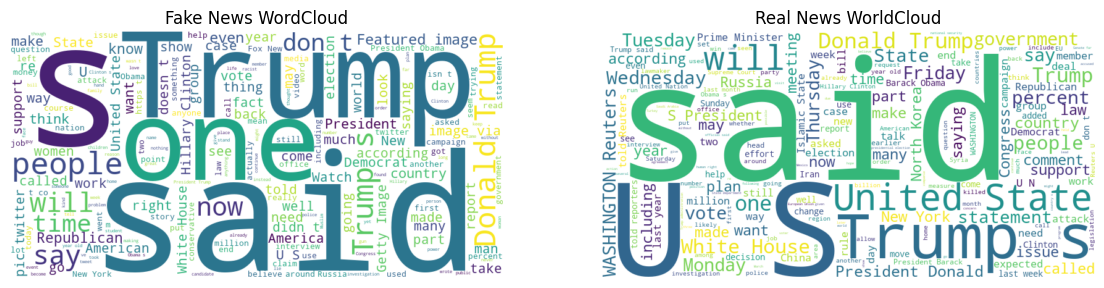

In [25]:
from wordcloud import WordCloud

fake_text = " ".join(News[News['label'] == 0]['text'])
real_text = " ".join(News[News['label']==1]['text'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
wc_fake = WordCloud(width = 800, height = 400, background_color='white').generate(fake_text)
plt.imshow(wc_fake, interpolation='bilinear')
plt.axis("off")
plt.title("Fake News WordCloud")

plt.subplot(1,2,2)
wc_real= WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.imshow(wc_real, interpolation='bilinear')
plt .axis("off")
plt.title("Real News WorldCloud")
plt.show()

## Top N Words (Unigram)

In [54]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


In [55]:
# Top 20 words in Fake news
top_fake_words = get_top_n_words(News[News['label'] == 0]['text'], 20)
top_real_words = get_top_n_words(News[News['label'] == 1]['text'], 20)


In [56]:
# Plot Fake News Top Words
fake_df = pd.DataFrame(top_fake_words, columns=['word', 'freq'])
real_df = pd.DataFrame(top_real_words, columns=['word', 'freq'])


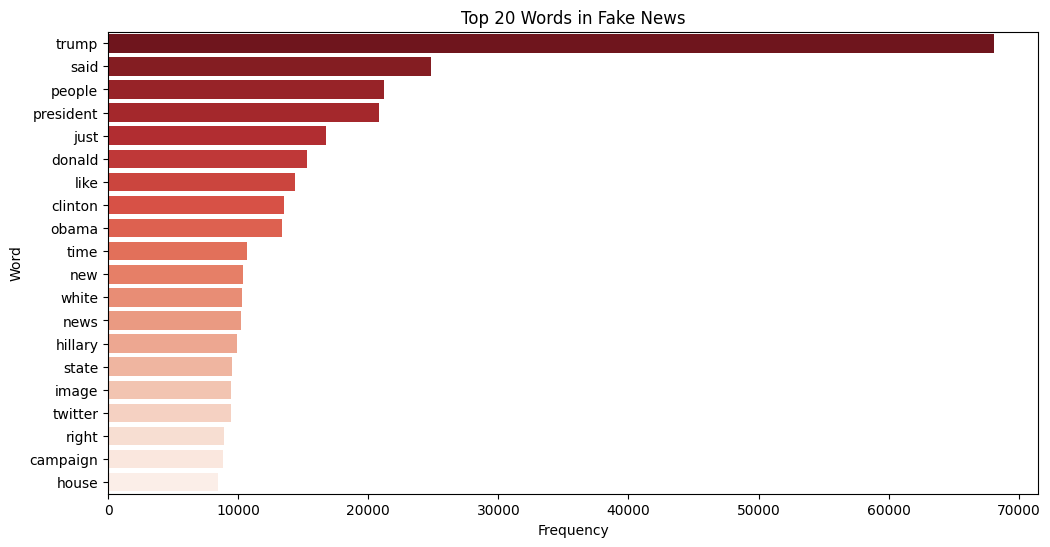

In [58]:
plt.figure(figsize=(12,6))
sns.barplot(data=fake_df, x='freq', y='word', hue='word', legend=False,  palette='Reds_r')
plt.title("Top 20 Words in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

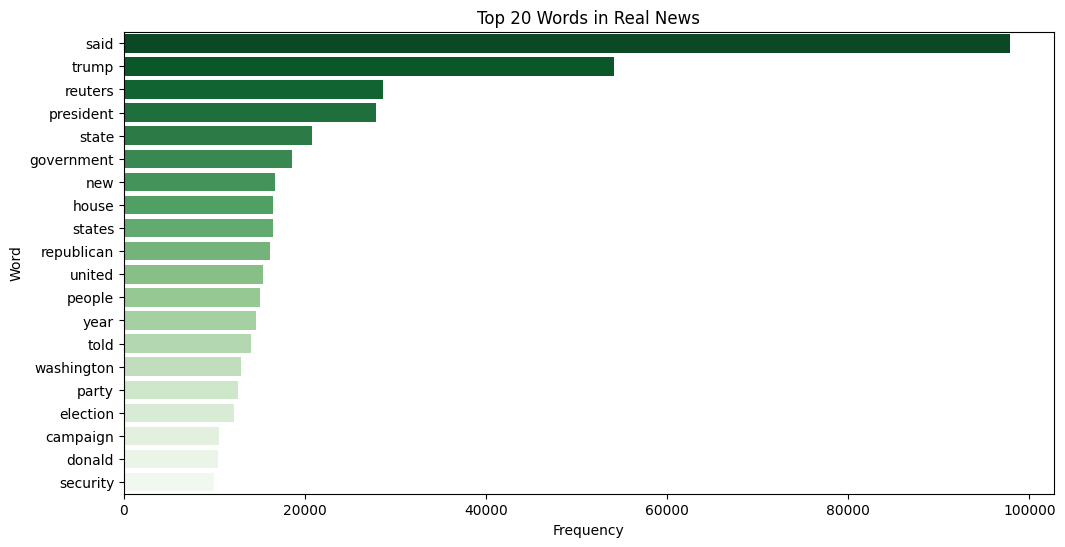

In [59]:
# Plot Real News Top Words
plt.figure(figsize=(12,6))
sns.barplot(data=real_df, x='freq', y='word', hue="word", legend=False,  palette='Greens_r')
plt.title("Top 20 Words in Real News")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

## Top N Bigrams 

In [27]:
def get_top_n_ngrams(corpus, n=None, ngram_range=(2,2)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag = vec.transform(corpus)
    sum_words = bag.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    return sorted(words_freq, key=lambda x: x[1], reverse=True)[:n]


- top 20 bigrams 

In [30]:
top_fake_bigrams = get_top_n_ngrams(News[News['label'] == 0]['text'], 20)
top_real_bigrams = get_top_n_ngrams(News[News['label'] == 1]['text'], 20)


In [32]:
# Convert to DataFrame
fake_bigrams_df = pd.DataFrame(top_fake_bigrams, columns=["bigram", "freq"])
real_bigrams_df = pd.DataFrame(top_real_bigrams, columns=["bigram", "freq"])


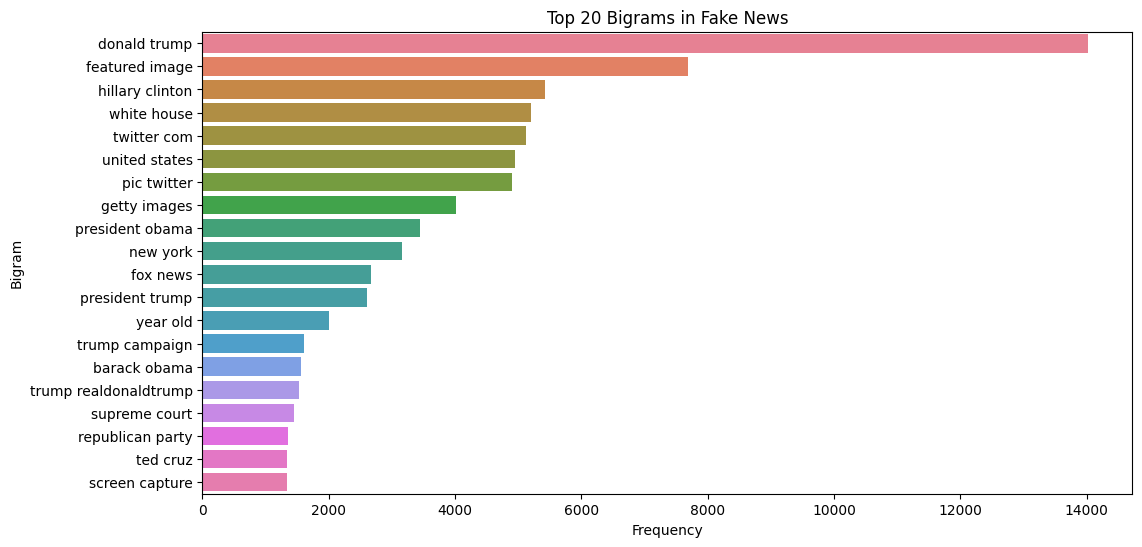

In [51]:
colors = sns.color_palette("husl", 20)  
plt.figure(figsize=(12, 6))
sns.barplot(data=fake_bigrams_df, x="freq", y="bigram", hue= "bigram", palette=colors,legend=False)
plt.title("Top 20 Bigrams in Fake News")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()

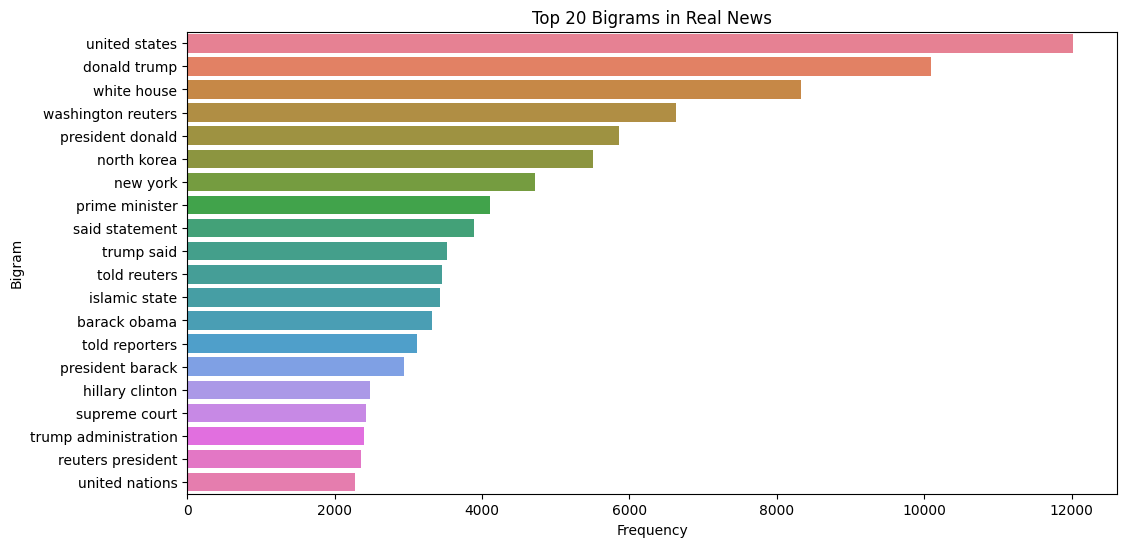

In [53]:
colors = sns.color_palette("husl", 20)  
plt.figure(figsize=(12, 6))
sns.barplot(data=real_bigrams_df, x="freq", y="bigram", hue= "bigram", palette=colors,legend=False)
plt.title("Top 20 Bigrams in Real News")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()